<a href="https://colab.research.google.com/github/abhijitguinkatwa/machine-learning-project/blob/main/Video_game_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [2]:
games = pd.read_csv('/content/video_games_sales.csv')

games.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E


In [3]:
games.shape

(16719, 16)

In [4]:
# Even from one glance you can see that there are many categorical type data which we will handle in Feature Engineering.

In [5]:
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [6]:
games['Rating'][1] == np.nan

False

In [7]:
# Since finding the sales (I am taking other_sales as I am Indian, you can take NA or Eu sales also) is the objective, for all the null 
# values in rating and user_score we are directly going to remove those rows.

games_filtered = games[games['Rating'].notna()]

games_filtered.isnull().sum()

Name                  0
Platform              0
Year_of_Release     181
Genre                 0
Publisher             7
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       1896
Critic_Count       1896
User_Score           71
User_Count         2446
Developer             0
Rating                0
dtype: int64

In [8]:
games_filtered.shape

(9950, 16)

In [9]:
games_filtered['Year_of_Release'].value_counts()

2009.0    1011
2008.0     981
2007.0     821
2010.0     799
2005.0     706
2011.0     703
2006.0     678
2002.0     655
2003.0     613
2004.0     598
2012.0     355
2014.0     345
2001.0     339
2013.0     316
2015.0     315
2016.0     280
2000.0     148
1999.0      42
1998.0      32
1997.0      19
1996.0       7
1992.0       2
1994.0       1
2020.0       1
1985.0       1
1988.0       1
Name: Year_of_Release, dtype: int64

In [10]:
games_filtered['Publisher'].value_counts()

Electronic Arts                 1139
Ubisoft                          784
Activision                       781
THQ                              532
Konami Digital Entertainment     382
                                ... 
Mercury Games                      1
Pacific Century Cyber Works        1
iWin                               1
NDA Productions                    1
Mentor Interactive                 1
Name: Publisher, Length: 332, dtype: int64

In [11]:
games_filtered['User_Score'].value_counts()
# tbd is to be decided.

tbd    2375
7.8     322
8       286
8.2     278
8.5     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

In [12]:
# Now for this project I will remove all null values but what you can do is fill some of them up apart those that I have and see if
# they help in getting more accuracy from the model that you build.

df1 = games_filtered[games_filtered['Critic_Score'].notna()]
df2 = df1[df1['Critic_Score'].notna()]
df3 = df2[df2['Critic_Count'].notna()]
df4 = df3[df3['User_Count'].notna()]

df4['Year_of_Release'].fillna(2009.0, inplace=True)
df4['Publisher'].fillna("Electronic Arts", inplace = True)
df4['User_Score'].fillna("tbd", inplace =True)

df4.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [13]:
# Now if we were working on an industry level project, removing so many data-points won't be allowed. You will have to work more on the dataset.
# But for project level, we can do this as our main purpose in to understand and build a machine learning model not train a highly perceptive ml 
# model. This dataset can be a prime example of how in real life you will get your dataset; having lots of irregular and null values 
# which needs alot of preprocessing.

In [14]:
df4.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,6947.000000,6947.000000,6947.000000,6947.000000,6947.000000,6947.000000,6947.000000,6947.000000,6947.000000
mean,2007.464517,0.392840,0.234648,0.063236,0.082189,0.773098,70.263567,28.873615,173.821362
std,4.179323,0.961157,0.682293,0.285257,0.267832,1.948883,13.888922,19.195731,584.511840
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,24.000000,27.000000
75%,2010.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,88.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,10665.000000


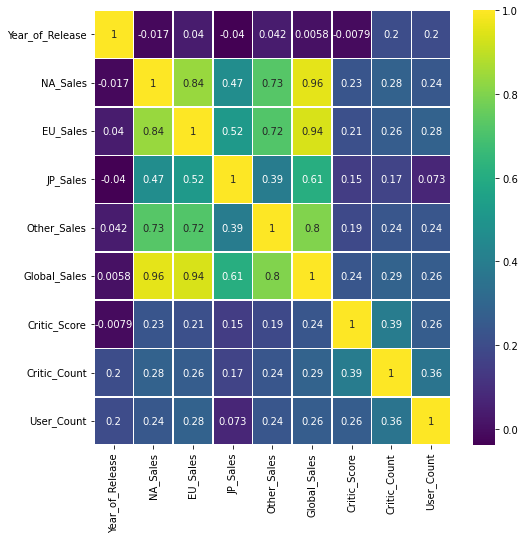

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(df4.corr(),annot=True,cmap='viridis',linewidths=.5)

In [16]:
filtered_df = df4.drop(['Global_Sales'], axis=1)

filtered_df.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,80.0,73.0,8,192.0,Nintendo,E


In [17]:
# Finding categorical type data columns in our dataset.

filtered_df['Platform'].value_counts()

PS2     1161
X360     877
PS3      783
PC       667
XB       580
Wii      491
DS       468
PSP      393
GC       356
GBA      241
PS4      239
XOne     159
3DS      157
PS       153
PSV      119
WiiU      89
DC        14
Name: Platform, dtype: int64

In [18]:
# From all the above categories that we got, I am going to reduce the categories to only 5 values

In [19]:

def platform(x):
  if x == 'PS2':
    return 'PS2'
  elif x == 'X360':
    return 'X360'
  elif x == 'PS3':
    return 'PS3'
  elif x == 'PC':
    return 'PC'
  else:
    return 'other_console'

filtered_df['Platform_new'] = filtered_df['Platform'].map(platform)

filtered_df.head(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Platform_new
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,51.0,8,322.0,Nintendo,E,other_console


In [20]:
filtered_df['Genre'].value_counts()

Action          1663
Sports           965
Shooter          882
Role-Playing     718
Racing           591
Platform         407
Misc             394
Fighting         382
Simulation       301
Strategy         274
Adventure        249
Puzzle           121
Name: Genre, dtype: int64

In [21]:
Developers_list = dict(filtered_df['Developer'].value_counts())

print(Developers_list)

{'EA Canada': 152, 'EA Sports': 145, 'Capcom': 128, 'Ubisoft': 104, 'Konami': 98, 'Ubisoft Montreal': 88, 'EA Tiburon': 86, 'Omega Force': 69, 'Nintendo': 68, 'Visual Concepts': 68, 'Electronic Arts': 68, "Traveller's Tales": 68, 'Vicarious Visions': 59, 'Codemasters': 58, 'Namco': 55, "Yuke's": 48, 'Midway': 44, 'TT Games': 43, 'Neversoft Entertainment': 43, 'Treyarch': 42, 'Maxis': 42, 'From Software': 41, 'Square Enix': 40, 'Eurocom Entertainment Software': 40, 'Sonic Team': 36, 'TOSE': 34, 'Radical Entertainment': 34, 'Harmonix Music Systems': 32, 'Arc System Works': 32, 'Sega': 32, 'Artificial Mind and Movement': 32, 'High Voltage Software': 31, 'Rebellion': 30, 'Gearbox Software': 27, 'Koei': 27, 'Climax Group': 26, 'Acclaim': 25, 'Rainbow Studios': 25, 'KCET': 25, 'SCEA San Diego Studios': 25, 'EA DICE': 24, 'Krome Studios': 24, 'Criterion Games': 24, 'EA Games': 24, 'Ubisoft Shanghai': 23, 'Griptonite Games': 23, 'Nippon Ichi Software': 22, 'Exient Entertainment': 22, 'BioWare'

In [22]:
# Doing the same as we did for Platform column, building only 3-4 categories for the Developer column.

def developer(x):
  if x.find('EA') >= 0 or x.find('Electronic Arts') >= 0:
    return 'EA'
  elif x.find('Capcom') >= 0:
    return 'Capcom'
  elif x.find('Ubisoft') >= 0:
    return 'Ubisoft'
  elif x.find('Konami') >= 0:
    return 'Komani'
  elif x.find('Nitendo') >= 0:
    return 'Nitendo'
  else:
    return 'other_dev'


filtered_df['Developer_new'] = filtered_df['Developer'].map(developer)

filtered_df.head(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Platform_new,Developer_new
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,51.0,8,322.0,Nintendo,E,other_console,other_dev


In [23]:
filtered_df['Rating'].value_counts()

T       2420
E       2118
M       1459
E10+     946
RP         2
AO         1
K-A        1
Name: Rating, dtype: int64

In [24]:
def rating(x):
  if x == 'T':
    return 'T'
  elif x == 'E':
    return 'E'
  elif x == 'M':
    return 'M'
  elif x == 'E10+':
    return 'E10+'
  else:
    return 'other_rating'

filtered_df['Rating_new'] = filtered_df['Rating'].map(rating)

filtered_df.head(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Platform_new,Developer_new,Rating_new
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,51.0,8,322.0,Nintendo,E,other_console,other_dev,E


In [26]:
pub = dict(filtered_df['Publisher'].value_counts())

print(pub)

{'Electronic Arts': 960, 'Ubisoft': 498, 'Activision': 498, 'Sony Computer Entertainment': 316, 'THQ': 309, 'Nintendo': 292, 'Sega': 288, 'Take-Two Interactive': 274, 'Konami Digital Entertainment': 248, 'Namco Bandai Games': 241, 'Capcom': 200, 'Atari': 179, 'Microsoft Game Studios': 141, 'Warner Bros. Interactive Entertainment': 139, 'Tecmo Koei': 137, 'Square Enix': 135, 'Eidos Interactive': 125, 'Vivendi Games': 116, 'Codemasters': 113, 'Midway Games': 105, '505 Games': 80, 'Deep Silver': 77, 'Disney Interactive Studios': 75, 'LucasArts': 71, 'Unknown': 67, 'Acclaim Entertainment': 66, 'Nippon Ichi Software': 61, 'Rising Star Games': 52, 'Bethesda Softworks': 48, 'D3Publisher': 36, 'Focus Home Interactive': 31, 'Ignition Entertainment': 30, 'Empire Interactive': 28, 'Atlus': 25, 'Zoo Digital Publishing': 24, 'Kalypso Media': 24, 'Majesco Entertainment': 23, 'PQube': 22, 'TDK Mediactive': 21, 'SouthPeak Games': 21, 'Global Star': 20, 'Universal Interactive': 19, 'Virgin Interactive'

In [27]:
def publisher(x):
  if x == 'Electronic Arts':
    return 'Electronic Arts'
  elif x == 'Activision':
    return 'Activision'
  elif x == 'Ubisoft':
    return 'Ubisoft'
  elif x == 'Sony Computer Entertainment':
    return 'Sony Computer Entertainment'
  elif x == 'Nintendo':
    return 'Nintendo'
  elif x == 'Konami Digital Entertainment':
    return 'Konami Digital Entertainment'
  else:
    return 'other_publisher'

filtered_df['Publisher_new'] = filtered_df['Publisher'].map(publisher)

filtered_df.head(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Platform_new,Developer_new,Rating_new,Publisher_new
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,51.0,8,322.0,Nintendo,E,other_console,other_dev,E,Nintendo


In [28]:
# Removing all unwanted columns from the dataset.

new_df = filtered_df.drop(['Platform', 'Genre', 'Publisher', 'User_Score', 'Developer', 'Rating', 'Name'], axis = 1)

new_df.head(2)

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Count,Platform_new,Developer_new,Rating_new,Publisher_new
0,2006.0,41.36,28.96,3.77,8.45,76.0,51.0,322.0,other_console,other_dev,E,Nintendo
2,2008.0,15.68,12.76,3.79,3.29,82.0,73.0,709.0,other_console,other_dev,E,Nintendo


In [29]:
y = new_df['Other_Sales']

plat_new = pd.get_dummies(new_df['Platform_new'])
dev_new = pd.get_dummies(new_df['Developer_new'])
rat_new = pd.get_dummies(new_df['Rating_new'])
pub_new = pd.get_dummies(new_df['Publisher_new'])

X_ = pd.concat([new_df, plat_new, dev_new, rat_new, pub_new], axis = 1)
X = X_.drop(['Other_Sales', 'Platform_new', 'Developer_new', 'Rating_new', 'Publisher_new'], axis = 1) 

X.head()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Count,PC,PS2,PS3,...,M,T,other_rating,Activision,Electronic Arts,Konami Digital Entertainment,Nintendo,Sony Computer Entertainment,Ubisoft,other_publisher
0,2006.0,41.36,28.96,3.77,76.0,51.0,322.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2008.0,15.68,12.76,3.79,82.0,73.0,709.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2009.0,15.61,10.93,3.28,80.0,73.0,192.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,2006.0,11.28,9.14,6.50,89.0,65.0,431.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,2006.0,13.96,9.18,2.93,58.0,41.0,129.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [30]:
X.columns

Index(['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Critic_Score',
       'Critic_Count', 'User_Count', 'PC', 'PS2', 'PS3', 'X360',
       'other_console', 'Capcom', 'EA', 'Komani', 'Ubisoft', 'other_dev', 'E',
       'E10+', 'M', 'T', 'other_rating', 'Activision', 'Electronic Arts',
       'Konami Digital Entertainment', 'Nintendo',
       'Sony Computer Entertainment', 'Ubisoft', 'other_publisher'],
      dtype='object')

In [31]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [32]:
reg = LinearRegression()
model1 = reg.fit(Xtrain, ytrain)

In [33]:
print(reg.score(Xtrain, ytrain))

0.4919491254394004


In [34]:
# Predicting 
pred = reg.predict(Xtest)

r2_score = reg.score(Xtest,ytest)
print(r2_score)

0.8755842052415067
